# 0 Introduction
**General Goal**:
Identify the right company to make investment.

**Data Set**:
4 individual data sets. Time period of data is from *31/01/2016* to *31/12/2018*.
***Cab_Data.csv*** – this file includes details of transaction for 2 cab companies
***Customer_ID.csv*** – this is a mapping table that contains a unique identifier which links the customer’s demographic details
***Transaction_ID.csv*** – this is a mapping table that contains transaction to customer mapping and payment mode
***City.csv*** – this file contains list of US cities, their population and number of cab users

In [1]:
import pandas as pd
pd.set_option('display.max_rows', False)
pd.set_option('expand_frame_repr', False)

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from scipy import stats
import plotly.express as px

In [85]:
# def some functions

# display basic data info
def data_info(data, name):
    print(f'\033[1mOverview of DataSet: {name}\033[0m')
    print(f'\033[1mShape\033[0m: {data.shape}')
    print('\n\033[1mNull Values\033[0m:')
    print(data.isnull().sum())
    print(f'\n\033[1mColumns\033[0m:')
    print(data.columns)
    print(f'\n\033[1mDescription\033[0m:')
    print(data.describe())
    print(f'\n\033[1mHead 5 Samples\033[0m:')
    print((data.head(5)))

# Outlier points and lower-upper limits were analyzed by IQR method by filtering the data from the statistical value table of the desired variables.
def showIQRstats(df, var):
    median_mean_ratio = df[var][5]/df[var][1] # median/mean
    Q1     = df[var][4]
    Q3     = df[var][6]
    IQR    = df[var][6]-df[var][4] # Q3-Q1
    upper_band = Q3 + 1.5*IQR
    lower_band = Q1 - 1.5*IQR
    print('\n' + "median/mean ratio of " +  str(var) + " is: " + str(median_mean_ratio) +
          '\n' + "IQR value of " + str(var) + " is: " + str(IQR) +
          '\n' + "Upper and Lower Limits of " + str(var) + " is: "  + str((lower_band,upper_band))
         )
    return upper_band , lower_band

# 1 Load Dataset

In [59]:
Cab = pd.read_csv('../G2M Insight/Data/Cab_Data.csv')
City = pd.read_csv('../G2M Insight/Data/City.csv')
Customer = pd.read_csv('../G2M Insight/Data/Customer_ID.csv')
Transaction = pd.read_csv('../G2M Insight/Data/Transaction_ID.csv')

In [60]:
data_info(Cab, 'Cab')

Overview of DataSet: Cab
Shape: (359392, 7)

Null Values:
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

Columns:
Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

Description:
       Transaction ID   KM Travelled  Price Charged   Cost of Trip
count    3.593920e+05  359392.000000  359392.000000  359392.000000
mean     1.022076e+07      22.567254     423.443311     286.190113
std      1.268058e+05      12.233526     274.378911     157.993661
min      1.000001e+07       1.900000      15.600000      19.000000
25%      1.011081e+07      12.000000     206.437500     151.200000
50%      1.022104e+07      22.440000     386.360000     282.480000
75%      1.033094e+07      32.960000     583.660000     413.683200
max      1.044011e+07      48.000000    2048.030000     691.200000

Head 5 Samples:
   T

In [36]:
data_info(City, 'City')

Overview of DataSet: City
Shape: (20, 3)

Null Values:
City          0
Population    0
Users         0
dtype: int64

Columns:
Index(['City', 'Population', 'Users'], dtype='object')

Description:
               City   Population      Users
count            20           20         20
unique           20           20         20
top     NEW YORK NY   8,405,837    302,149 
freq              1            1          1

Head 5 Samples:
             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 


In [37]:
data_info(Customer, 'Customer')

Overview of DataSet: Customer
Shape: (49171, 4)

Null Values:
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

Columns:
Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

Description:
        Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000     42.000000        21035.000000
max    60000.000000     65.000000        35000.000000

Head 5 Samples:
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23          

In [38]:
data_info(Transaction, 'Transaction')

Overview of DataSet: Transaction
Shape: (440098, 3)

Null Values:
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

Columns:
Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

Description:
       Transaction ID    Customer ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   21195.549816
min      1.000001e+07       1.000000
25%      1.011004e+07    3530.000000
50%      1.022006e+07   15168.000000
75%      1.033008e+07   43884.000000
max      1.044011e+07   60000.000000

Head 5 Samples:
   Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card


# 2 Data Preprocessing

## Create Master Data: Identify relationships across the 4 files

In [112]:
MasterData = Cab.merge(Transaction, on= 'Transaction ID').merge(Customer, on ='Customer ID').merge(City, on = 'City')
data_info(MasterData, 'Master Data')

Overview of DataSet: Master Data
Shape: (359392, 14)

Null Values:
Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

Columns:
Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users'],
      dtype='object')

Description:
       Transaction ID   KM Travelled  Price Charged   Cost of Trip    Customer ID            Age  Income (USD/Month)
count    3.593920e+05  359392.000000  359392.000000  359392.000000  359392.000000  359392.000000       359392.000000
mean     1.022076e+07      22.567254     423.443311     286.190113   19191.652115    

In [113]:
MasterData.dtypes

Transaction ID          int64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Population             object
Users                  object
dtype: object

## Replacing spaces with '_' in column names

In [114]:
for column in MasterData.columns:
    if ' ' in column:
        MasterData = MasterData.rename(columns={column:column.replace(' ','_')})

## Convert the 'Date of Travel' column into datetime standard format

In [115]:
MasterData['Date_of_Travel'] = pd.to_datetime(MasterData['Date_of_Travel'])

MasterData['Year_of_Travel'] = MasterData['Date_of_Travel'].dt.year
MasterData['Month_of_Travel'] = MasterData['Date_of_Travel'].dt.month
MasterData.head(5)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year_of_Travel,Month_of_Travel
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",2016,1
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",2018,7
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",2018,11
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",2016,1
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",2018,4


## Add column of 'Profit'

In [116]:
MasterData['Profit'] = MasterData['Price_Charged'] - MasterData['Cost_of_Trip']
MasterData['ProfitPercentage'] = (MasterData['Profit']/MasterData['Cost_of_Trip'])*100
MasterData.head(5)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year_of_Travel,Month_of_Travel,Profit,ProfitPercentage
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",2016,1,57.3150,18.274427
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",2018,7,281.2772,88.612790
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",2018,11,194.6480,32.582415
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",2016,1,23.6660,7.067558
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",2018,4,253.9808,54.371732


## Removing ',' in population and users column values

In [117]:
for column in ['Population', 'Users'] :
        MasterData[column] = MasterData[column].str.replace(',','')
        MasterData[column] = MasterData[column].astype('int64')

## Convert some columns from object to category

In [118]:
for column in ["Company", "City" , "Payment_Mode" , "Gender" ] :
        MasterData[column] = MasterData[column].astype('category')

In [120]:
MasterData.dtypes

Transaction_ID                 int64
Date_of_Travel        datetime64[ns]
Company                     category
City                        category
KM_Travelled                 float64
Price_Charged                float64
Cost_of_Trip                 float64
Customer_ID                    int64
Payment_Mode                category
Gender                      category
Age                            int64
Income_(USD/Month)             int64
Population                     int64
Users                          int64
Year_of_Travel                 int64
Month_of_Travel                int64
Profit                       float64
ProfitPercentage             float64
dtype: object

In [124]:
MasterData.head(10)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year_of_Travel,Month_of_Travel,Profit,ProfitPercentage
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,2016,1,57.3150,18.274427
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,2018,7,281.2772,88.612790
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,2018,11,194.6480,32.582415
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,2016,1,23.6660,7.067558
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,2018,4,253.9808,54.371732
5,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885,24701,2018,5,50.8912,58.155523
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,814885,24701,2018,10,25.0960,17.681458
7,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701,2016,1,27.5680,28.236644
8,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701,2016,9,210.0920,42.510846
9,10186994,2017-06-23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,814885,24701,2017,6,118.9736,48.234548


In [123]:
#MasterData.to_csv('../G2M Insight/Data/Master_Data.csv',index=False)

# 3 Exploratory Data Analysis

In [2]:
MasterData = pd.read_csv('../G2M Insight/Data/Master_Data.csv')

### Data checking

#### Missing data

In [70]:
print(MasterData.isnull().sum())

Transaction_ID        0
Date_of_Travel        0
Company               0
City                  0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Income_(USD/Month)    0
Population            0
Users                 0
Year_of_Travel        0
Month_of_Travel       0
Profit                0
ProfitPercentage      0
dtype: int64


<font color=blue size=4> There are ***no*** missing values. </font>

#### Duplicated data

In [72]:
print(MasterData[MasterData.duplicated()].shape[0])

0


<font color=blue size=4> There are ***no*** duplicated rows. </font>

#### Outliers

In [6]:
Pink_Cab = MasterData [MasterData['Company'] == 'Pink Cab']
Yellow_Cab = MasterData [MasterData['Company'] == 'Yellow Cab']
selected_vars = ['KM_Travelled','Price_Charged','Cost_of_Trip', 'Age' ,'Income_(USD/Month)', 'Population' , 'Users']

Pink_fil = Pink_Cab[selected_vars]
Yellow_fil = Yellow_Cab[selected_vars]

In [88]:
print(Pink_fil.describe())

       KM_Travelled  Price_Charged  Cost_of_Trip           Age  Income_(USD/Month)    Population          Users
count  84711.000000   84711.000000  84711.000000  84711.000000        84711.000000  8.471100e+04   84711.000000
mean      22.559917     310.800856    248.148682     35.322414        15059.047137  2.350642e+06  125590.813330
std       12.231092     181.995661    135.403345     12.644780         7991.077762  2.734890e+06   94593.433659
min        1.900000      15.600000     19.000000     18.000000         2000.000000  2.489680e+05    3643.000000
25%       12.000000     159.970000    131.868000     25.000000         8371.000000  8.148850e+05   27247.000000
50%       22.440000     298.060000    246.330000     33.000000        14713.000000  1.595037e+06  144132.000000
75%       32.960000     441.505000    360.180000     42.000000        21055.000000  1.955130e+06  164468.000000
max       48.000000    1623.480000    576.000000     65.000000        35000.000000  8.405837e+06  302149

In [89]:
print(Yellow_fil.describe())

        KM_Travelled  Price_Charged   Cost_of_Trip            Age  Income_(USD/Month)    Population          Users
count  274681.000000  274681.000000  274681.000000  274681.000000       274681.000000  2.746810e+05  274681.000000
mean       22.569517     458.181990     297.922004      35.341112        15045.669817  3.373228e+06  168473.246981
std        12.234298     288.386166     162.548986      12.578625         7962.727062  3.439014e+06  100570.558886
min         1.900000      20.730000      22.800000      18.000000         2000.000000  2.489680e+05    3643.000000
25%        11.990000     226.680000     158.400000      25.000000         8439.000000  6.712380e+05   80021.000000
50%        22.440000     425.060000     295.596000      33.000000        14676.000000  1.595037e+06  144132.000000
75%        32.960000     633.880000     432.432000      42.000000        21023.000000  8.405837e+06  302149.000000
max        48.000000    2048.030000     691.200000      65.000000        34996.0

In [90]:
print('Check Outliers of Pink Cab:')
for var in selected_vars :
    upper_band , lower_band = showIQRstats(Pink_fil.describe() , var)
    outliers = Pink_fil[(Pink_fil[var] < lower_band) | (Pink_fil[var] > upper_band)][var].values
    print('\n' + str(var) + " has " + str(len(outliers)) + " outliers : "    + str(outliers))
    print('\n**********************************************************\n')

Check Outliers of Pink Cab:

median/mean ratio of KM_Travelled is: 0.9946845204681968
IQR value of KM_Travelled is: 20.96
Upper and Lower Limits of KM_Travelled is: (-19.44, 64.4)

KM_Travelled has 0 outliers : []

**********************************************************


median/mean ratio of Price_Charged is: 0.9590063670969948
IQR value of Price_Charged is: 281.53499999999997
Upper and Lower Limits of Price_Charged is: (-262.3325, 863.8074999999999)

Price_Charged has 237 outliers : [ 902.65  870.48  896.35  901.07  869.94  891.22  901.71 1078.86  953.
  885.4   880.62  903.42  905.8   889.1  1105.72  880.57  910.33  954.04
  997.84 1021.72  983.99  870.29 1022.59  865.58  877.99 1014.03  977.81
  870.15  911.85  942.39  867.5   876.05  998.15  905.57  902.75  985.04
  904.36 1069.03  992.    884.49 1133.03  932.53 1517.15 1495.6   936.29
  894.83 1368.66 1234.24  951.53 1623.48 1319.52 1339.31 1094.02  893.57
 1172.53 1055.64 1106.11 1203.14 1045.77 1003.77  867.71  892.56 1050.2

In [93]:
fig,axes = plt.subplots(2, 2, figsize=(15, 4), sharey=True)
sns.boxplot(ax=axes[0, 0], data=Pink_fil , x='Price_Charged', color='pink').set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1, 0], data=Yellow_fil , x='Price_Charged', color='yellow').set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[0, 1], data=Pink_fil , x='Population', color='pink').set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1, 1], data=Yellow_fil , x='Population', color='yellow').set_ylabel("Yellow Cab")
plt.show()

<font color=blue size=4> ***Price_Charged*** and ***Population*** have outliers (statistically). </font>
<font color=blue size=4> Considering lack of further background information, so keep the data at this stage. </font>

## Categorical variables

### Company

<font color=red size=4> ***How is the market sharing of two companies?*** </font>

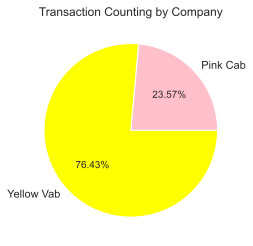

Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction_ID, dtype: int64


In [124]:
company = MasterData.groupby(['Company']).Transaction_ID.count()
plt.pie(company, labels=['Pink Cab', 'Yellow Vab'], autopct='%1.2f%%', colors=['pink','yellow'])
plt.title('Transaction Counting by ' + 'Company')
plt.show()
print(company)

<font color=blue size=4> ***Yellow Cab*** is used more than Pink Cab. 76.4% of the transactions are from Yellow Cab, approximately ***3 times*** that of Pink Cab.</font>

### City

<font color=red size=4> ***Do the market situation vary in cities?*** </font>

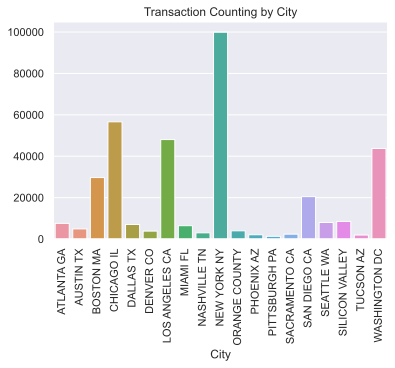

In [34]:
city = MasterData.groupby(['City']).Transaction_ID.count()
sns.barplot(x = city.index, y = city.values)
plt.title('Transaction Counting by ' + 'City')
plt.xticks(rotation = 90)
plt.show()

<font color=blue size=4>***NEW YORK NY*** has the most transactions while ***PITTSBURGH PA*** with least. </font>

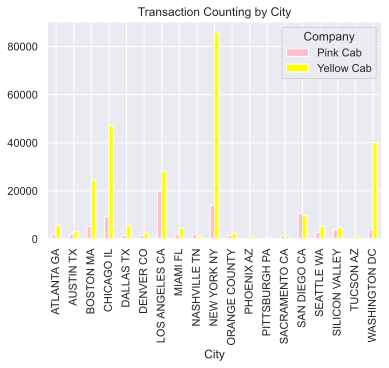

In [6]:
city = MasterData.groupby(['City','Company']).Transaction_ID.count().unstack()
city.plot(kind='bar', stacked = False, color = ['pink', 'yellow'])
plt.title('Transaction Counting by ' + 'City')
plt.show()

<font color=blue size=4>For ***Pink Cab***: ***LOS ANGELES CA*** has the most transactions, followed by ***NEW YORK NY***, ***SAN DIEGO CA***.</font>
<font color=blue size=4>For ***Yellow Cab***: ***NEW YORK NY*** has the most transactions, followed by ***CHICAGO IL***, ***WASHINGTON DC***.</font>

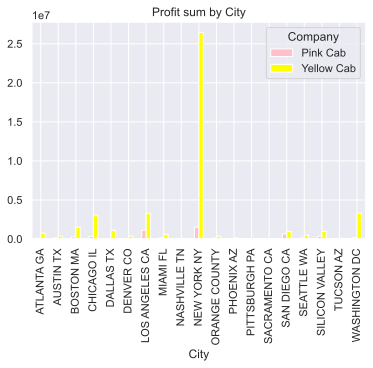

Company            Pink Cab    Yellow Cab
City                                     
ATLANTA GA        96050.076  7.463828e+05
AUSTIN TX        147445.290  3.792557e+05
BOSTON MA        262001.698  1.506718e+06
CHICAGO IL       318722.488  3.068591e+06
DALLAS TX         24730.112  1.104003e+06
DENVER CO         40584.939  3.570001e+05
LOS ANGELES CA  1125732.065  3.285977e+06
MIAMI FL         162301.191  5.960001e+05
NASHVILLE TN      64284.534  8.524768e+04
...                     ...           ...
ORANGE COUNTY    101995.833  3.550060e+05
PHOENIX AZ        35596.394  1.573445e+05
PITTSBURGH PA     17107.738  6.805822e+04
SACRAMENTO CA     55324.012  6.200218e+04
SAN DIEGO CA     637889.769  9.492737e+05
SEATTLE WA       112781.335  4.919035e+05
SILICON VALLEY   340250.531  9.764547e+05
TUCSON AZ         59289.575  8.097112e+04
WASHINGTON DC    193766.353  3.299104e+06

[19 rows x 2 columns]


In [5]:
city_profit = MasterData.groupby(['City','Company']).Profit.sum().unstack()
city_profit.plot(kind='bar', stacked = False, color = ['pink', 'yellow'])
plt.title('Profit sum by ' + 'City')
plt.show()
print(city_profit)

### Payment

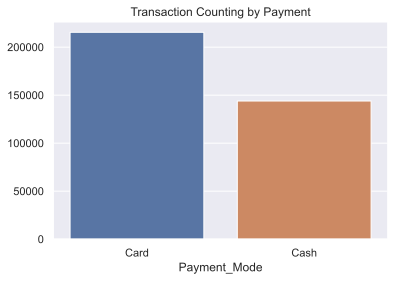

Payment_Mode
Card    215504
Cash    143888
Name: Transaction_ID, dtype: int64


In [37]:
payment = MasterData.groupby(['Payment_Mode']).Transaction_ID.count()
sns.barplot(x = payment.index, y = payment.values)
plt.title('Transaction Counting by ' + 'Payment')
plt.show()
print(payment)

<font color=blue size=4>Num of transactions paid by ***Card*** is 1.5 times num of those paid by cash.</font>

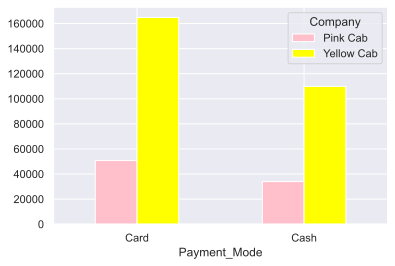

In [33]:
payment = MasterData.groupby(['Payment_Mode','Company']).Transaction_ID.count().unstack()
payment.plot(kind='bar', stacked = False, color = ['pink', 'yellow'])
plt.xticks(rotation = 0)
plt.show()

<font color=blue size=4> Yellow Cab has bigger gap in payment method than Pink Cab, but they both have more transactions paid by card.</font>

### Gender

<font color=red size=4> ***Is there gender differences of users?*** </font>

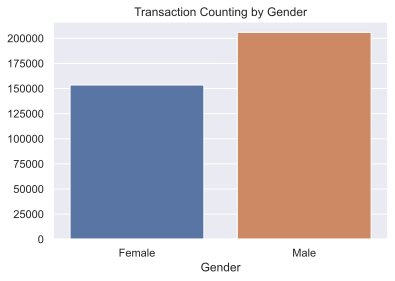

Gender
Female    153480
Male      205912
Name: Transaction_ID, dtype: int64


In [40]:
gender = MasterData.groupby(['Gender']).Transaction_ID.count()
sns.barplot(x = gender.index, y = gender.values)
plt.title('Transaction Counting by ' + 'Gender')
plt.show()
print(gender)

<font color=blue size=4>***Male*** use cab more frequently than female.</font>

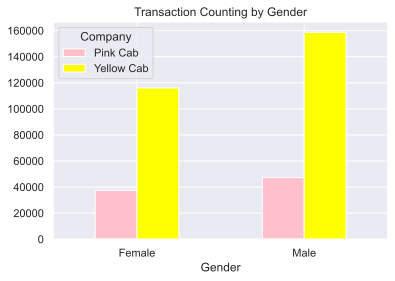

In [34]:
gender = MasterData.groupby(['Gender','Company']).Transaction_ID.count().unstack()
gender.plot(kind='bar', stacked = False, color = ['pink', 'yellow'])
plt.title('Transaction Counting by ' + 'Gender')
plt.xticks(rotation = 0)
plt.show()

<font color=blue size=4> Yellow Cab has bigger gap in gender difference than Pink Cab, but they both have more male users.</font>

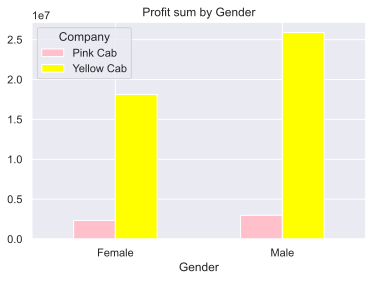

In [10]:
gender_profit = MasterData.groupby(['Gender','Company']).Profit.sum().unstack()
gender_profit.plot(kind='bar', stacked = False, color = ['pink', 'yellow'])
plt.title('Profit sum by ' + 'Gender')
plt.xticks(rotation = 0)
plt.show()

<font color=blue size=4> Looks there is more obvious ***gender difference*** in ***profit*** of ***Yellow Cab***. </font>
<font color=blue size=4> Later wee can further raise hypothesis and test. </font>

## Numerical variables

### Year

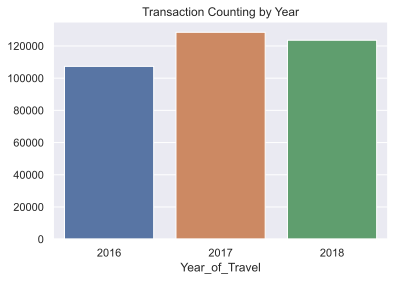

Year_of_Travel
2016    107319
2017    128510
2018    123563
Name: Transaction_ID, dtype: int64


In [30]:
year = MasterData.groupby(['Year_of_Travel']).Transaction_ID.count()
sns.barplot(x = year.index, y = year .values)
plt.title('Transaction Counting by ' + 'Year')
plt.show()
print(year)

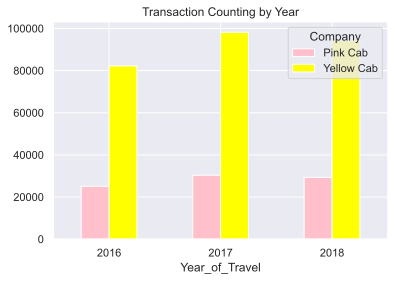

Company         Pink Cab  Yellow Cab
Year_of_Travel                      
2016               25080       82239
2017               30321       98189
2018               29310       94253


In [35]:
year = MasterData.groupby(['Year_of_Travel','Company']).Transaction_ID.count().unstack()
year.plot(kind='bar', stacked = False, color = ['pink', 'yellow'])
plt.title('Transaction Counting by ' + 'Year')
plt.xticks(rotation = 0)
plt.show()
print(year)

<font color=blue size=4>***2017*** has the most transactions but the 'Year' column approximately has fairly distributed data.</font>

### Month

<font color=red size=4> ***Is there any seasonality in transactions of cab service?*** </font>

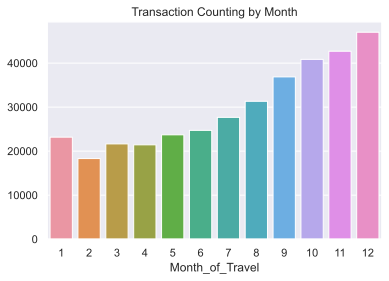

In [42]:
month = MasterData.groupby(['Month_of_Travel']).Transaction_ID.count()
sns.barplot(x = month.index, y = month.values)
plt.title('Transaction Counting by ' + 'Month')
plt.show()

<font color=blue size=4>***December*** has the most transactions while ***February*** with the least.</font>
<font color=blue size=4>It can be said that transactions increase by month. ***No*** seasonality can be observed.</font>

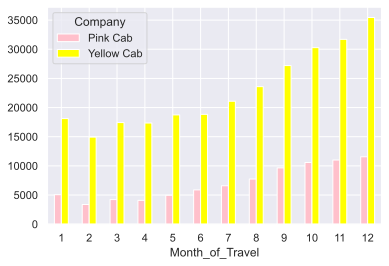

In [3]:
month = MasterData.groupby(['Month_of_Travel','Company']).Transaction_ID.count().unstack()
month.plot(kind='bar', stacked = False, color = ['pink', 'yellow'])
plt.xticks(rotation = 0)
plt.show()

<font color=blue size=4>Same trends in both Pink Cab & Yellow Cab. </font>

### KM_Travelled

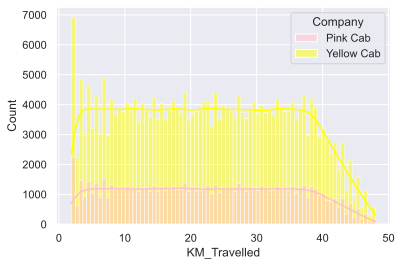

In [50]:
sns.histplot(data = MasterData , x='KM_Travelled' , kde = True , hue='Company', palette=['pink', 'yellow'])
plt.show()

<font color=blue size=4> For both Pink Cab & Yellow Cab: Most transactions travel ***2 ~ 40*** KM. The most transactions are ***short-distance*** travel.</font>

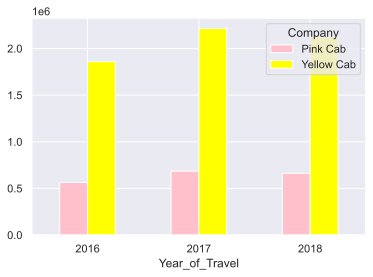

Company          Pink Cab  Yellow Cab
Year_of_Travel                       
2016            563509.67  1859978.21
2017            685823.52  2214879.02
2018            661739.92  2124560.24


In [4]:
KM= MasterData.groupby(['Year_of_Travel','Company']).KM_Travelled.sum().unstack()
KM.plot(kind='bar', stacked = False, color = ['pink', 'yellow'])
plt.xticks(rotation = 0)
plt.show()
print(KM)

<font color=blue size=4> For both Pink Cab & Yellow Cab: ***2017*** has the most KM_Travelled sum.</font>

### Price_Charged, Cost_of_Trip, Profit

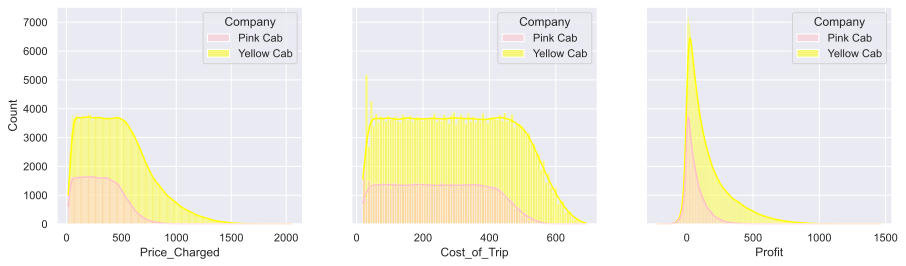

In [7]:
fig,axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
sns.histplot(ax=axes[0], data=MasterData , x='Price_Charged' , kde = True , hue='Company', palette=['pink', 'yellow'])
sns.histplot(ax=axes[1], data=MasterData , x='Cost_of_Trip' , kde = True , hue='Company', palette=['pink', 'yellow'])
sns.histplot(ax=axes[2], data=MasterData , x='Profit' , kde = True , hue='Company', palette=['pink', 'yellow'])
plt.show()

<font color=blue size=4> For both Pink Cab & Yellow Cab: Profit are ***not*** too high. Maybe since the most transactions are ***short-distance*** travel.</font>

### Age, Income_(USD/Month)

<font color=red size=4> ***Is there any obvious features of users' age & income?*** </font>

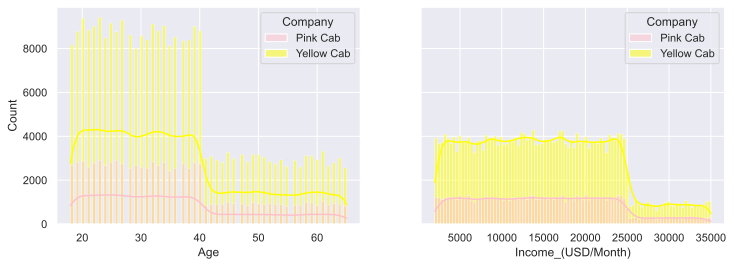

In [8]:
fig,axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
sns.histplot(ax=axes[0], data=MasterData , x='Age' , kde = True , hue='Company', palette=['pink', 'yellow'])
sns.histplot(ax=axes[1], data=MasterData , x='Income_(USD/Month)' , kde = True , hue='Company', palette=['pink', 'yellow'])
plt.show()

<font color=blue size=4>People ages in the range of ***18 ~ 40*** use cab more frequently than those whose age is over 40.</font>
<font color=blue size=4>People's income in the range of ***5000 ~ 25000*** USD/Month use cab more frequently than those whose income is over 25000.</font>

### Population, Users

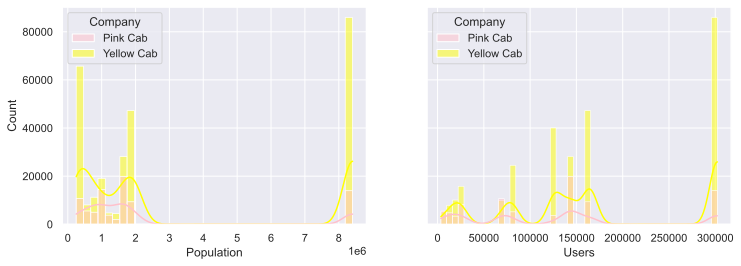

In [9]:
fig,axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
sns.histplot(ax=axes[0], data=MasterData , x='Population' , kde = True , hue='Company', palette=['pink', 'yellow'])
sns.histplot(ax=axes[1], data=MasterData , x='Users' , kde = True , hue='Company', palette=['pink', 'yellow'])
plt.show()

## Correlation

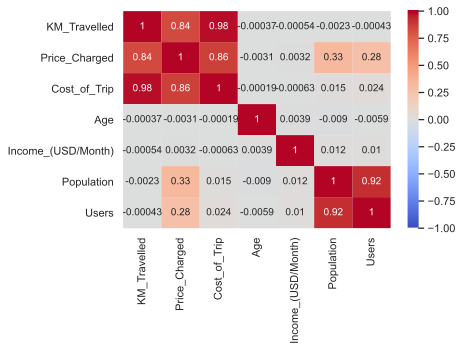

In [106]:
sns.heatmap(MasterData[selected_vars].corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

### Further check

In [112]:
coef1 , _ = stats.pearsonr(MasterData['KM_Travelled'],MasterData['Price_Charged'])
coef2 , _ = stats.pearsonr(MasterData['KM_Travelled'],MasterData['Cost_of_Trip'])
coef3 , _ = stats.pearsonr(MasterData['Price_Charged'],MasterData['Cost_of_Trip'])
coef4 , _ = stats.pearsonr(MasterData['Users'],MasterData['Population'])

print('Pearson correlation coefficient:')
print('KM_Travelled & Price_Charged : '+ str(coef1))
print('KM_Travelled & Cost_of_Trip : '+ str(coef2))
print('Price_Charged & Cost_of_Trip : '+ str(coef3))
print('Users & Population : '+ str(coef4))

Pearson correlation coefficient:
KM_Travelled & Price_Charged : 0.8357531580209331
KM_Travelled & Cost_of_Trip : 0.9818483823189854
Price_Charged & Cost_of_Trip : 0.859811726291571
Users & Population : 0.915490344475287


<font color=blue size=4>There is strongly positive correlation between ***KM_Travelled & Price_Charged*** , ***KM_Travelled & Cost_of_Trip***, ***Price_Charged & Cost_of_Trip***, ***Users & Population***.</font>

# 4 EDA Summary

## Transactions

<font color=red size=4> ***1. Is there any seasonality in transactions of cab service?*** </font>
<font color=blue size=4>***2017*** has the most transactions but the 'Year' column approximately has fairly distributed data.</font>
<font color=blue size=4>***December*** has the most transactions while ***February*** with the least.</font>
<font color=blue size=4>It can be said that transactions increase by month. ***No*** seasonality can be observed.</font>

<font color=red size=4> ***2. How is the travel distance (KM) of transactions?*** </font>
<font color=blue size=4> For both Pink Cab & Yellow Cab: ***2017*** has the most KM_Travelled sum.</font>
<font color=blue size=4> For both Pink Cab & Yellow Cab: Most transactions travel ***2 ~ 40*** KM. The most transactions are ***short-distance*** travel.</font>
<font color=blue size=4> For both Pink Cab & Yellow Cab: Profit are ***not*** too high. Maybe since the most transactions are ***short-distance*** travel.</font>

<font color=red size=4> ***3. Which payment method is prefered?*** </font>
<font color=blue size=4>Num of transactions paid by ***Card*** is 1.5 times num of those paid by cash.</font>
<font color=blue size=4> Yellow Cab has bigger gap in payment method than Pink Cab, but they both have more transactions paid by card.</font>

## Market

<font color=red size=4> ***1. How is the market sharing of two companies?*** </font>
<font color=blue size=4> ***Yellow Cab*** is used more than Pink Cab. 76.4% of the transactions are from Yellow Cab, approximately ***3 times*** that of Pink Cab.</font>

<font color=red size=4> ***2. Do the market situation vary in cities?*** </font>
<font color=blue size=4>***NEW YORK NY*** has the most transactions while ***PITTSBURGH PA*** with least. </font>
<font color=blue size=4>For ***Pink Cab***: ***LOS ANGELES CA*** has the most transactions, followed by ***NEW YORK NY***, ***SAN DIEGO CA***.</font>
<font color=blue size=4>For ***Yellow Cab***: ***NEW YORK NY*** has the most transactions, followed by ***CHICAGO IL***, ***WASHINGTON DC***.</font>

## Customers

<font color=red size=4> ***1. Is there gender differences of customers?*** </font>
<font color=blue size=4>***Male*** use cab more frequently than female.</font>
<font color=blue size=4> Yellow Cab has bigger gap in gender difference than Pink Cab, but they both have more male users.</font>
<font color=blue size=4> Looks there is more obvious ***gender difference*** in ***profit*** of ***Yellow Cab***. </font>

<font color=red size=4> ***2. Is there any obvious features of customers' age & income?*** </font>
<font color=blue size=4>People ages in the range of ***18 ~ 40*** use cab more frequently than those whose age is over 40.</font>
<font color=blue size=4>People's income in the range of ***5000 ~ 25000*** USD/Month use cab more frequently than those whose income is over 25000.</font>

## Others

<font color=red size=4> ***Is there any correlation amongst attributions?*** </font>
<font color=blue size=4>There is strongly positive correlation between ***KM_Travelled & Price_Charged*** , ***KM_Travelled & Cost_of_Trip***, ***Price_Charged & Cost_of_Trip***, ***Users & Population***.</font>

# 5 Hypothesis & test

Based on the above EDA results. Let's further focus on three hypothesis.

<font color=red size=4> ***1. Null Hypothesis: There is no gender difference in profit.*** </font>

In [10]:
a = Pink_Cab[Pink_Cab.Gender=='Female'].groupby('Transaction_ID').Profit.mean()
b = Pink_Cab[Pink_Cab.Gender=='Male'].groupby('Transaction_ID').Profit.mean()
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)

print('Test for Pink Cab:')
print('P value is ', p_value)

if(p_value < 0.05):
    print('We accept alternate hypothesis that there is statistical gender difference in profit.')
else:
    print('We accept null hypothesis that there is no statistical gender difference in profit.')

Test for Pink Cab:
P value is  0.11515305900425186
We accept null hypothesis that there is no statistical gender difference in profit.


In [11]:
a = Yellow_Cab[Yellow_Cab.Gender=='Female'].groupby('Transaction_ID').Profit.mean()
b = Yellow_Cab[Yellow_Cab.Gender=='Male'].groupby('Transaction_ID').Profit.mean()
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)

print('Test for Yellow Cab:')
print('P value is ', p_value)

if(p_value < 0.05):
    print('We accept alternate hypothesis that there is statistical gender difference in profit.')
else:
    print('We accept null hypothesis that there is no statistical gender difference in profit.')

Test for Yellow Cab:
P value is  6.060473042494144e-25
We accept alternate hypothesis that there is statistical gender difference in profit.


<font color=blue size=4>Result:</font>
<font color=blue size=4>For ***Yellow Cab*** - There is statistical gender difference in profit.</font>

<font color=red size=4> ***2. Null Hypothesis: There is no age difference in profit.*** </font>

In [12]:
a = Pink_Cab[Pink_Cab.Age <= 40].groupby('Transaction_ID').Profit.mean()
b = Pink_Cab[Pink_Cab.Age > 40].groupby('Transaction_ID').Profit.mean()
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)

print('Test for Pink Cab:')
print('P value is ', p_value)

if(p_value < 0.05):
    print('We accept alternate hypothesis that there is statistical age difference in profit.')
else:
    print('We accept null hypothesis that there is no statistical age difference in profit.')

Test for Pink Cab:
P value is  0.15128344738584695
We accept null hypothesis that there is no statistical age difference in profit.


In [13]:
a = Yellow_Cab[Yellow_Cab.Age <= 40].groupby('Transaction_ID').Profit.mean()
b = Yellow_Cab[Yellow_Cab.Age > 40].groupby('Transaction_ID').Profit.mean()
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)

print('Test for Yellow Cab:')
print('P value is ', p_value)

if(p_value < 0.05):
    print('We accept alternate hypothesis that there is statistical age difference in profit.')
else:
    print('We accept null hypothesis that there is no statistical age difference in profit.')

Test for Yellow Cab:
P value is  0.9031038421935373
We accept null hypothesis that there is no statistical age difference in profit.


<font color=blue size=4>Result:</font>
<font color=blue size=4>For both cabs - There is ***no*** statistical age difference in profit.</font>

<font color=red size=4> ***3. Null Hypothesis: There is no distance difference in profit.*** </font>

In [15]:
a = Pink_Cab[Pink_Cab.KM_Travelled <= 5].groupby('Transaction_ID').Profit.mean()
b = Pink_Cab[Pink_Cab.KM_Travelled > 5].groupby('Transaction_ID').Profit.mean()
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)

print('Test for Pink Cab:')
print('P value is ', p_value)

if(p_value < 0.05):
    print('We accept alternate hypothesis that there is statistical distance difference in profit.')
else:
    print('We accept null hypothesis that there is no statistical distance difference in profit.')

Test for Pink Cab:
P value is  0.0
We accept alternate hypothesis that there is statistical distance difference in profit.


In [16]:
a = Yellow_Cab[Yellow_Cab.KM_Travelled <= 5].groupby('Transaction_ID').Profit.mean()
b = Yellow_Cab[Yellow_Cab.KM_Travelled > 5].groupby('Transaction_ID').Profit.mean()
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)

print('Test for Yellow Cab:')
print('P value is ', p_value)

if(p_value < 0.05):
    print('We accept alternate hypothesis that there is statistical distance difference in profit.')
else:
    print('We accept null hypothesis that there is no statistical distance difference in profit.')

Test for Yellow Cab:
P value is  0.0
We accept alternate hypothesis that there is statistical distance difference in profit.


<font color=blue size=4>Result:</font>
<font color=blue size=4>For both cabs - There ***is*** statistical age difference in profit.</font>

# 6 Recommendations & Insights

<font color=red size=4> Briefly, based on the analysis, ***Yellow Cab*** is more worthy to make investment.</font>

- Yellow Cab is more popular and has more market sharing.

- In many cities (especially New York, Washington, Chicago, Boston, Los Angeles, etc), Yellow Cab has overwhelming expansion advantage.

- What's more, in New York, Yellow Cab's profit is extremely higher than Pink Cab.

- Though target customers have similar features (age range: 18 to 40, income range: 5000 to 25000), Yellow Cab is more appeal to males and has higher profit gained from this group.

- Though short-distance travel are the main market, Yellow Cab has the ability to deal with long-distance travel, which can directly lead to higher profit.
